# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [2]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [23]:
# url string that hosts our .csv file
ruta = "datasets/iris/irisFinal.csv"

# Load the dataset
df = pd.read_csv(ruta)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [24]:
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth           Class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


2. Rename column Class to Flower. And save in two other variables the original dataset.

In [28]:
df = df.rename(columns = {"Class":"Flower"})
df1 = df
df2 = df
print(df1)
print(df2)

     SepalLength  SepalWidth  PetalLength  PetalWidth          Flower
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]
     SepalLength  SepalWidth  PetalLength  PetalWidth          Flower
0            5.1         3.5          1.4         0.2     Iris-set

3. Encoding the class label categorical column: from string to num


In [67]:
# Encoding the categorical column
df = df.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
df1 = df1.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })
df2 = df2.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
print(df1)
print(df2)
print(df)

# Note: this is not necesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset

     PetalLength  PetalWidth  Flower  Cluster
0            1.4         0.2       0        0
1            1.4         0.2       0        0
2            1.3         0.2       0        0
3            1.5         0.2       0        0
4            1.4         0.2       0        0
..           ...         ...     ...      ...
145          5.2         2.3       2        1
146          5.0         1.9       2        1
147          5.2         2.0       2        1
148          5.4         2.3       2        1
149          5.1         1.8       2        1

[150 rows x 4 columns]
     SepalLength  SepalWidth  Flower  Cluster
0            5.1         3.5       0        0
1            4.9         3.0       0        0
2            4.7         3.2       0        0
3            4.6         3.1       0        0
4            5.0         3.6       0        0
..           ...         ...     ...      ...
145          6.7         3.0       2        1
146          6.3         2.5       2        2
147       

4. Discard columns that won't be used


In [30]:
# For df1 drop Sepal Width and Length
df1.drop(["SepalWidth", "SepalLength"],axis='columns',inplace=True)

# For df2 drop Petal Width and Length
df2.drop(["PetalWidth", "PetalLength"],axis='columns',inplace=True)

#Visualize the dataset
print(df1)
print(df2)


     PetalLength  PetalWidth  Flower
0            1.4         0.2       0
1            1.4         0.2       0
2            1.3         0.2       0
3            1.5         0.2       0
4            1.4         0.2       0
..           ...         ...     ...
145          5.2         2.3       2
146          5.0         1.9       2
147          5.2         2.0       2
148          5.4         2.3       2
149          5.1         1.8       2

[150 rows x 3 columns]
     SepalLength  SepalWidth  Flower
0            5.1         3.5       0
1            4.9         3.0       0
2            4.7         3.2       0
3            4.6         3.1       0
4            5.0         3.6       0
..           ...         ...     ...
145          6.7         3.0       2
146          6.3         2.5       2
147          6.5         3.0       2
148          6.2         3.4       2
149          5.9         3.0       2

[150 rows x 3 columns]


5. Scatter plot of the data

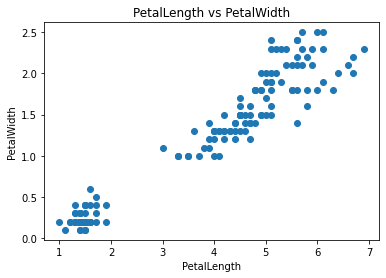

In [31]:
plt.scatter(df1.PetalLength,df1.PetalWidth)
plt.title('PetalLength vs PetalWidth')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.show()

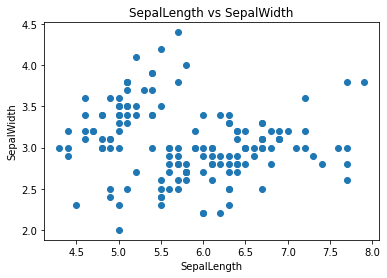

In [34]:
plt.scatter(df2.SepalLength,df2.SepalWidth)
plt.title('SepalLength vs SepalWidth')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-42-d134019139d9>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Se.PetalLength, df1Se.PetalWidth, Label='Setosa')
<ipython-input-42-d134019139d9>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Ve.PetalLength, df1Ve.PetalWidth, Label='Versicolor')
<ipython-input-42-d134019139d9>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1Vi.PetalLength, df1Vi.PetalWidth, Label='Virginica')


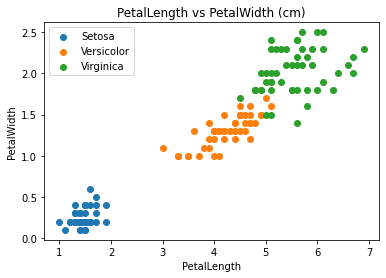

In [42]:
# Iris-setosa:0, Iris-versicolor:1, Iris-virginica:2
# (Salen algunos warnings por la versión de la librería)
df1Se = df1[df1.Flower == 0]
df1Ve = df1[df1.Flower == 1]
df1Vi = df1[df1.Flower == 2]

plt.scatter(df1Se.PetalLength, df1Se.PetalWidth, Label='Setosa')
plt.scatter(df1Ve.PetalLength, df1Ve.PetalWidth, Label='Versicolor')
plt.scatter(df1Vi.PetalLength, df1Vi.PetalWidth, Label='Virginica')

plt.title('PetalLength vs PetalWidth (cm)')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()

<ipython-input-43-181f011fb0dc>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Se.SepalLength, df2Se.SepalWidth, Label='Setosa')
<ipython-input-43-181f011fb0dc>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Ve.SepalLength, df2Ve.SepalWidth, Label='Versicolor')
<ipython-input-43-181f011fb0dc>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2Vi.SepalLength, df2Vi.SepalWidth, Label='Virginica')


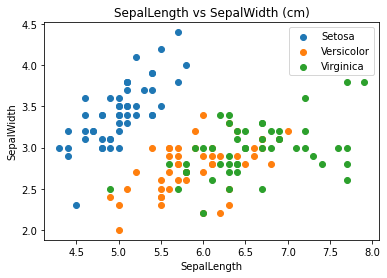

In [43]:
# Iris-setosa:0, Iris-versicolor:1, Iris-virginica:2
# (Salen algunos warnings por la versión de la librería)
df2Se = df2[df2.Flower == 0]
df2Ve = df2[df2.Flower == 1]
df2Vi = df2[df2.Flower == 2]

plt.scatter(df2Se.SepalLength, df2Se.SepalWidth, Label='Setosa')
plt.scatter(df2Ve.SepalLength, df2Ve.SepalWidth, Label='Versicolor')
plt.scatter(df2Vi.SepalLength, df2Vi.SepalWidth, Label='Virginica')

plt.title('SepalLength vs SepalWidth (cm)')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [46]:
#Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp1 = km.fit_predict(df1[['PetalLength','PetalWidth']])
yp2 = km.fit_predict(df2[['SepalLength','SepalWidth']])
# Print estimated cluster of each point in the dataser
print(yp1)
print(yp2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [58]:
# Add a new column to the dataset with the cluster information
df1["Cluster"] = yp1
df2["Cluster"] = yp2

# Visualize the dataset
print(df1)
print(df2)


     PetalLength  PetalWidth  Flower  Cluster
0            1.4         0.2       0        0
1            1.4         0.2       0        0
2            1.3         0.2       0        0
3            1.5         0.2       0        0
4            1.4         0.2       0        0
..           ...         ...     ...      ...
145          5.2         2.3       2        1
146          5.0         1.9       2        1
147          5.2         2.0       2        1
148          5.4         2.3       2        1
149          5.1         1.8       2        1

[150 rows x 4 columns]
     SepalLength  SepalWidth  Flower  Cluster
0            5.1         3.5       0        0
1            4.9         3.0       0        0
2            4.7         3.2       0        0
3            4.6         3.1       0        0
4            5.0         3.6       0        0
..           ...         ...     ...      ...
145          6.7         3.0       2        1
146          6.3         2.5       2        2
147       

In [50]:
# Visualize the ID of the clusters
print(df1.Cluster.unique())
print(df2.Cluster.unique())


[0 2 1]
[0 1 2]


In [51]:
# Center of each cluster
km.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [52]:
# Sum of squared error
km.inertia_

37.0507021276596

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-60-aa0af735acf3>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1V1.PetalLength, df1V1.PetalWidth, Label='Estimated Flower Group 1')
<ipython-input-60-aa0af735acf3>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1V2.PetalLength, df1V2.PetalWidth, Label='Estimated Flower Group 2')
<ipython-input-60-aa0af735acf3>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1V3.PetalLength, df1V3.PetalWidth, Label='Estimated Flower Group 3')


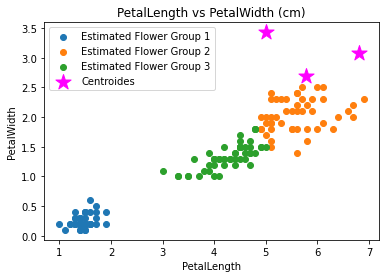

In [60]:
df1V1 = df1[df1.Cluster==0]
df1V2 = df1[df1.Cluster==1]
df1V3 = df1[df1.Cluster==2]

plt.scatter(df1V1.PetalLength, df1V1.PetalWidth, Label='Estimated Flower Group 1')
plt.scatter(df1V2.PetalLength, df1V2.PetalWidth, Label='Estimated Flower Group 2')
plt.scatter(df1V3.PetalLength, df1V3.PetalWidth, Label='Estimated Flower Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('PetalLength vs PetalWidth (cm)')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend()
plt.show()


<ipython-input-56-459047ac4075>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2V1.SepalLength, df2V1.SepalWidth, Label='Estimated Flower Group 1')
<ipython-input-56-459047ac4075>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2V2.SepalLength, df2V2.SepalWidth, Label='Estimated Flower Group 2')
<ipython-input-56-459047ac4075>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2V3.SepalLength, df2V3.SepalWidth, Label='Estimated Flower Group 3')


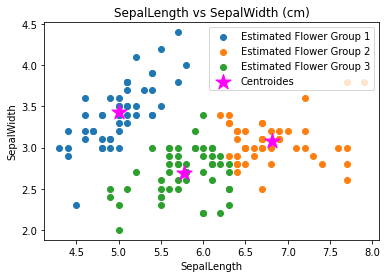

In [56]:
df2V1 = df2[df2.Cluster==0]
df2V2 = df2[df2.Cluster==1]
df2V3 = df2[df2.Cluster==2]

plt.scatter(df2V1.SepalLength, df2V1.SepalWidth, Label='Estimated Flower Group 1')
plt.scatter(df2V2.SepalLength, df2V2.SepalWidth, Label='Estimated Flower Group 2')
plt.scatter(df2V3.SepalLength, df2V3.SepalWidth, Label='Estimated Flower Group 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('SepalLength vs SepalWidth (cm)')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
plt.show()


Plot real clusters and visual comparison

In [61]:
# Ya tienen su plot correspondiente arriba.
# Como comentario, el modelo o Kmean de Petal Length and Width no salió bien, quizá se tienen que hacer otro km, pero por el momento lo dejaré así.

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [63]:
# df1
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df1[['PetalLength','PetalWidth']])
    sse.append(km.inertia_)


D:\Herramientas\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


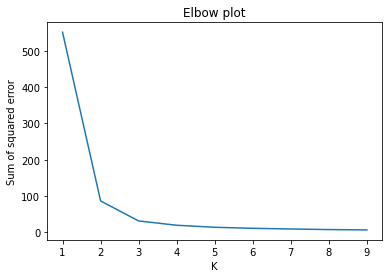

In [64]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


In [65]:
# df2
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df2[['SepalLength','SepalWidth']])
    sse.append(km.inertia_)


D:\Herramientas\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


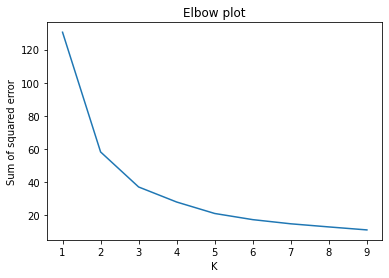

In [66]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


# Kmeans clustering

Kmeans clustering

In [68]:
# Define number of clusters
km = KMeans(n_clusters=6)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(df[['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 5, 5, 0,
       0, 5, 0, 5, 0, 5, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 4, 2, 2, 4, 3, 4, 2, 4,
       2, 2, 2, 1, 2, 2, 2, 4, 4, 1, 2, 1, 4, 1, 2, 4, 1, 1, 2, 4, 4, 4,
       2, 1, 1, 4, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [69]:
# Add a new column to the dataset with the cluster information
df["Cluster"] = yp

# Visualize the dataset
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth  Flower  Cluster
0            5.1         3.5          1.4         0.2       0        0
1            4.9         3.0          1.4         0.2       0        5
2            4.7         3.2          1.3         0.2       0        5
3            4.6         3.1          1.5         0.2       0        5
4            5.0         3.6          1.4         0.2       0        0
..           ...         ...          ...         ...     ...      ...
145          6.7         3.0          5.2         2.3       2        2
146          6.3         2.5          5.0         1.9       2        1
147          6.5         3.0          5.2         2.0       2        2
148          6.2         3.4          5.4         2.3       2        2
149          5.9         3.0          5.1         1.8       2        1

[150 rows x 6 columns]


In [70]:
# Visualize the ID of the clusters
print(df.Cluster.unique())

[0 5 1 3 2 4]


In [71]:
# Center of each cluster
km.cluster_centers_

array([[5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

In [72]:
# Sum of squared error
km.inertia_

39.03998724608725

In [73]:
# df
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['SepalLength','SepalWidth', 'PetalLength', 'PetalWidth']])
    sse.append(km.inertia_)


D:\Herramientas\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


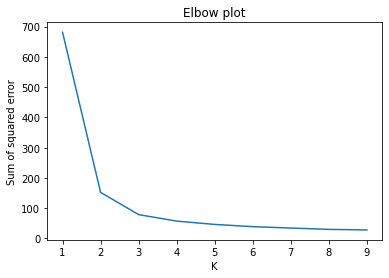

In [74]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.
En su parte correspondiente del documento.

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.
En su parte correspondiente del documento.

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible
En su parte correspondiente del documento (final).




5. Draw conclusiones:
    - About the scalling: does it helps or not?
    - About the elbow plot: does the K agree with the real number of clusters? Para Petal no, el modelo pone unos centroides muy fuera de los clusters.
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why? Para sepal lo hizo muy bien, pero para petal no, y lo mejor sepal si salió por como tuvo suerte al momento de que km escogiera los clusters y sus centros. Tal vez creando otro km pueda mejorar petal.